# Test notebook for loading in in NetCDF of sentinel 1

In [59]:
import xarray as xr
from pathlib import Path
import hvplot.xarray
import rasterio
import rioxarray
import numpy as np

In [60]:
sentinel_folder = Path(r'..\data\g0_020m')
testdata = xr.open_dataset(sentinel_folder/'20141118_S1A_D_110.nc')
testdata

<xarray.Dataset>
Dimensions:  (lon: 8600, lat: 4800)
Coordinates:
  * lon      (lon) float64 3.297 3.297 3.297 3.298 ... 5.002 5.003 5.003 5.003
  * lat      (lat) float64 51.43 51.43 51.43 51.43 ... 50.48 50.48 50.48 50.48
Data variables:
    g0vv     (lon, lat) float32 ...
    g0vh     (lon, lat) float32 ...
    lia      (lon, lat) float32 ...

In [61]:
print(testdata.rio.crs)

None


In [62]:
#testdata = testdata.transpose('lat','lon')

In [63]:
testdata.rio.write_crs("EPSG:4326", inplace = True)

<xarray.Dataset>
Dimensions:      (lon: 8600, lat: 4800)
Coordinates:
  * lon          (lon) float64 3.297 3.297 3.297 3.298 ... 5.003 5.003 5.003
  * lat          (lat) float64 51.43 51.43 51.43 51.43 ... 50.48 50.48 50.48
    spatial_ref  int32 0
Data variables:
    g0vv         (lon, lat) float32 ...
    g0vh         (lon, lat) float32 ...
    lia          (lon, lat) float32 ...

In [64]:
testdata

<xarray.Dataset>
Dimensions:      (lon: 8600, lat: 4800)
Coordinates:
  * lon          (lon) float64 3.297 3.297 3.297 3.298 ... 5.003 5.003 5.003
  * lat          (lat) float64 51.43 51.43 51.43 51.43 ... 50.48 50.48 50.48
    spatial_ref  int32 0
Data variables:
    g0vv         (lon, lat) float32 ...
    g0vh         (lon, lat) float32 ...
    lia          (lon, lat) float32 ...

In [65]:
#testdata.rio.reproject(dst_crs="EPSG:31370")
testdata.rio.crs

CRS.from_epsg(4326)

In [66]:
#testdata['g0vv'].plot(x = 'lon', y = 'lat')

In [67]:
from tkinter import PROJECTING
import cartopy.crs as ccrs
map_projection = ccrs.Globe()
#testdata['g0vv'].plot(transform = map_projection)

In [68]:
#coarsening van de projecties


In [69]:
#testdata['g0vv'].hvplot(cmap = 'cividis', crs = ccrs.epsg(4236), projection = ccrs.epsg(4326))
#testdata['g0vv'].hvplot(x = 'lat', y = 'lon', cmap = 'cividis', geo = True)

duurt te lang via hv plot! 

## Resampling 

https://corteva.github.io/rioxarray/stable/examples/resampling.html

## doel van de zwalm er uit te clippen 

In [70]:
import fiona
import rasterio.mask
zwalm_shape = fiona.open("../data/Zwalm_shape/OS266.shp")

In [71]:
zwalm_shape.crs

{'init': 'epsg:31370'}

nieuw idee: via geopandas omzetten van 31370 naar WGS84 en dan 
`` from rasterio.mask`` en  ``import mask out, _ = mask(data, gdf.geometry, invert=False)``

,PolygonId,Area,Subbasin,geometry
0,0,573.54,1,"POLYGON ((112280.000 175985.000, 112275.000 17..."
1,1,638.38,2,"MULTIPOLYGON (((109520.000 175740.000, 109520...."
2,13,702.16,3,"POLYGON ((105515.000 175235.000, 105515.000 17..."
3,14,134.08,4,"POLYGON ((102060.000 175270.000, 102055.000 17..."
4,12,262.14,5,"POLYGON ((106080.000 175480.000, 106080.000 17..."
5,8,393.53,6,"POLYGON ((109400.000 175445.000, 109400.000 17..."
6,5,2205.01,7,"POLYGON ((101960.000 174695.000, 101965.000 17..."
7,2,464.54,8,"POLYGON ((112380.000 173180.000, 112380.000 17..."
8,3,377.94,9,"POLYGON ((105860.000 171180.000, 105860.000 17..."
9,11,85.96,10,"MULTIPOLYGON (((107065.000 174375.000, 107065...."


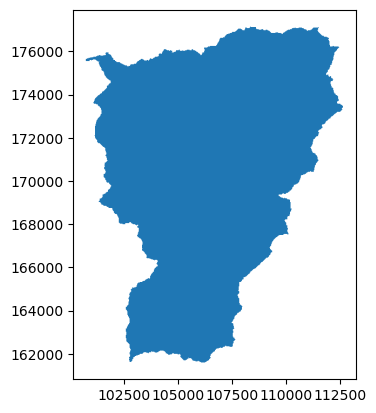

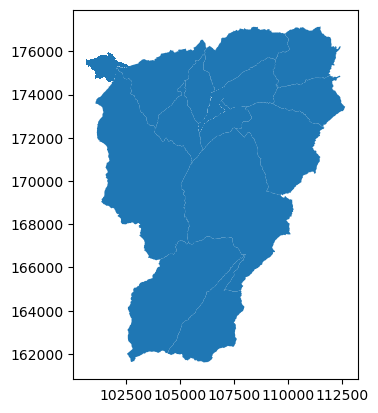

In [72]:
import geopandas as gpd
zwalm_gpd_emma = gpd.read_file("../data/Zwalm_shape/OS266.shp") #deze bevat de verschillende substroomgebieden
zwalm_gpd = gpd.read_file("../data/Zwalm_shape/zwalm_shapefile.shp")
zwalm_gpd.plot()
zwalm_gpd_emma.plot()
zwalm_gpd_emma

In [73]:
omtrekking_zwalm = zwalm_gpd_emma.unary_union
omtrekking_zwalm.area
d = {'PolygonId': 15, 'Area': omtrekking_zwalm.area, 'Subbasin':0,'geometry':omtrekking_zwalm}
zwalm_gpd_emma = zwalm_gpd_emma.append(d, ignore_index= True)
zwalm_gpd_emma

C:\Users\olivi\AppData\Local\Temp\ipykernel_1524\687597279.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zwalm_gpd_emma = zwalm_gpd_emma.append(d, ignore_index= True)


,PolygonId,Area,Subbasin,geometry
0,0,5.735400e+02,1,"POLYGON ((112280.000 175985.000, 112275.000 17..."
1,1,6.383800e+02,2,"MULTIPOLYGON (((109520.000 175740.000, 109520...."
2,13,7.021600e+02,3,"POLYGON ((105515.000 175235.000, 105515.000 17..."
3,14,1.340800e+02,4,"POLYGON ((102060.000 175270.000, 102055.000 17..."
4,12,2.621400e+02,5,"POLYGON ((106080.000 175480.000, 106080.000 17..."
5,8,3.935300e+02,6,"POLYGON ((109400.000 175445.000, 109400.000 17..."
6,5,2.205010e+03,7,"POLYGON ((101960.000 174695.000, 101965.000 17..."
7,2,4.645400e+02,8,"POLYGON ((112380.000 173180.000, 112380.000 17..."
8,3,3.779400e+02,9,"POLYGON ((105860.000 171180.000, 105860.000 17..."
9,11,8.596000e+01,10,"MULTIPOLYGON (((107065.000 174375.000, 107065...."


In [74]:
zwalm_gpd.crs

<Derived Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

In [75]:
zwalm_gpd_emma.crs = 31370
zwalm_gpd_emma.crs

<Derived Projected CRS: EPSG:31370>
Name: BD72 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore.
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

<AxesSubplot:>

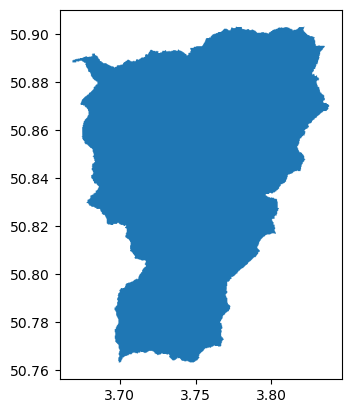

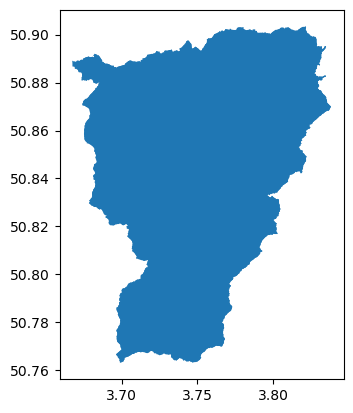

In [76]:
zwalm_gpd['geometry'] = zwalm_gpd['geometry'].to_crs(epsg = 4326)
zwalm_gpd.plot()
zwalm_gpd_emma['geometry'] = zwalm_gpd_emma['geometry'].to_crs(epsg = 4326)
zwalm_gpd_emma.plot()

In [77]:
#raster_lambert = testdata.rio.reproject("epsg:31370")
#FAALT!

In [78]:
len(zwalm_gpd_emma)

16

In [79]:
zwalm_shape_epsg4326 = zwalm_gpd_emma.iloc[[15]]
type(zwalm_shape_epsg4326)
#zwalm_shape_epsg4326 = gpd.GeoDataFrame(zwalm_shape_epsg4326)
zwalm_shape_epsg4326
zwalm_shape_epsg4326.crs
zwalm_shape_epsg4326.to_file(Path(r"../data/Zwalm_shape/zwalm_shapefile_emma.shp"))


In [80]:
zwalm_gpd_emma.iloc[[15]]

,PolygonId,Area,Subbasin,geometry
15,15,115208625.0,0,"POLYGON ((3.77050 50.79340, 3.77064 50.79340, ..."


Rasterising this polygon

In [81]:
testdata['g0vv'].shape

(8600, 4800)

In [82]:
geom = [shapes for shapes in zwalm_shape_epsg4326['geometry']]
geom

In [83]:
testdata_rasterio = rasterio.open('netcdf:../data/g0_020m/20141118_S1A_D_110.nc:g0vh')
from rasterio.crs import CRS
crs = CRS.from_epsg(4326)
crs

CRS.from_epsg(4326)

In [84]:
testdata_rasterio.transform

Affine(-0.0001984126984126983, 0.0, 51.42857142857142,
       0.0, -0.00019841269841269847, 5.003174603174572)

In [85]:
testdata_rasterio.bounds

BoundingBox(left=51.42857142857142, bottom=3.2968253968253656, right=50.476190476190474, top=5.003174603174572)

In [86]:
left = testdata_rasterio.bounds.left
right = testdata_rasterio.bounds.right
top = testdata_rasterio.bounds.top
bottom = testdata_rasterio.bounds.bottom
print(left, right)
from rasterio.coords import BoundingBox
#testdata_rasterio.bounds = BoundingBox(right, bottom, left, top)
#testdata_rasterio.bounds.left = right
#testdata.bounds._right = left

51.42857142857142 50.476190476190474


In [87]:
from rasterio.features import rasterize
rasterized_zwalm_shape = rasterize(
    zwalm_shape_epsg4326['geometry'],
    out_shape = testdata['g0vv'].shape,
    fill = 0,
    transform= testdata_rasterio.transform,
    all_touched= False,
    default_value = 1
)

In [88]:
#rasterized_zwalm_shape_bis = rasterize(geom, out_shape = )

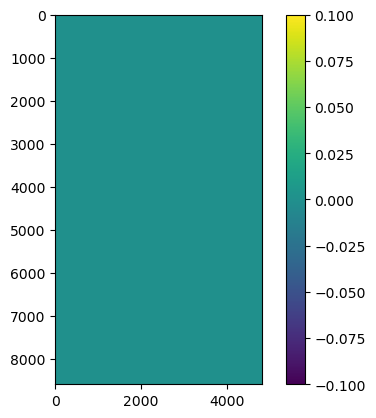

In [89]:
import matplotlib.pyplot as plt
plt.imshow(rasterized_zwalm_shape)
plt.colorbar()

In [90]:
testdata.attrs

{}

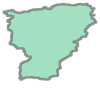

In [91]:
#zwalm_gpd_emma.iloc[15,1]
zwalm_gpd_emma.loc[len(zwalm_gpd_emma)-1,"geometry"]

In [92]:
out_image, out_transform = rasterio.mask.mask(testdata_rasterio,zwalm_shape_epsg4326['geometry'], invert = False)

c:\Users\olivi\miniconda3\envs\thesis\lib\site-packages\rasterio\mask.py:90: UserWarning: shapes are outside bounds of raster. Are they in different coordinate reference systems?
  warnings.warn('shapes are outside bounds of raster. '


In [93]:
zwalm_shape_epsg4326['geometry']

15    POLYGON ((3.77050 50.79340, 3.77064 50.79340, ...
Name: geometry, dtype: geometry

In [94]:
testdata_rasterio

<open DatasetReader name='netcdf:../data/g0_020m/20141118_S1A_D_110.nc:g0vh' mode='r'>

## Zet raster om naar Tif voor masking

In [95]:
#totiff = testdata['g0vv']
totiff = testdata
totiff

<xarray.Dataset>
Dimensions:      (lon: 8600, lat: 4800)
Coordinates:
  * lon          (lon) float64 3.297 3.297 3.297 3.298 ... 5.003 5.003 5.003
  * lat          (lat) float64 51.43 51.43 51.43 51.43 ... 50.48 50.48 50.48
    spatial_ref  int32 0
Data variables:
    g0vv         (lon, lat) float32 ...
    g0vh         (lon, lat) float32 ...
    lia          (lon, lat) float32 ...

In [96]:
totiff = totiff.rio.set_spatial_dims(x_dim = 'lon', y_dim = 'lat')
totiff = totiff.transpose('lat','lon')
totiff.rio.crs

CRS.from_epsg(4326)

In [97]:
#totiff.rio.to_raster(r"../data/g0_020m_tiff/test_raster_test.tiff")

In [98]:
#totiff.to_netcdf(r"../data/g0_020m_tiff/test_raster_test.nc", engine = 'h5netcdf')
#from osgeo import gdal
#gdal.Translate(r"../data/g0_020m_tiff/test_raster_test.tiff",
#    r"../data/g0_020m_tiff/test_raster_test.nc",
#    format = 'GeoTIFF'
#)

In [99]:
#from osgeo import gdal
#gdal.Translate(r"../data/g0_020m_tiff/test_raster_test.tiff",
#    r'..\data\g0_020m\20141118_S1A_D_110.nc',
#    format = 'GeoTIFF'
#)

In [100]:
testdata_rasterio_bis = rasterio.open(r"../data/g0_020m_tiff/test_raster_test.tiff")

In [101]:
type(testdata_rasterio_bis)

rasterio.io.DatasetReader

In [102]:
testdata_rasterio_bis.crs

CRS.from_epsg(4326)

In [103]:
testdata_rasterio_bis.bounds

BoundingBox(left=3.296825396825365, bottom=50.476190476190474, right=5.003174603174572, top=51.42857142857142)

<class 'numpy.ndarray'>
(3, 708, 861)
(708, 861)


Text(0.5, 1.0, 'Backscatter vv [dB]')

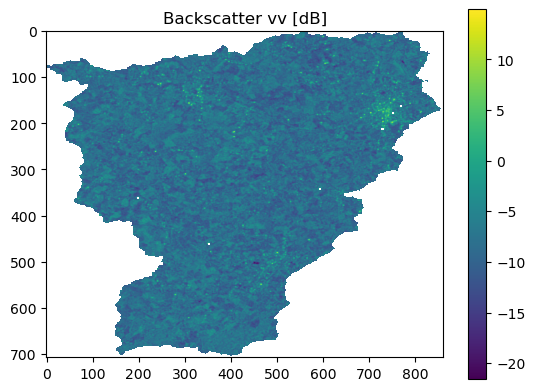

In [104]:
out_image, out_transform = rasterio.mask.mask(testdata_rasterio_bis,zwalm_shape_epsg4326['geometry'], invert = False, crop = True)
print(type(out_image))
print(out_image.shape)
out_image_vv = out_image[0,:,:]
out_image_masked = np.ma.masked_where(out_image_vv == -9999, out_image_vv)
print(out_image_masked.shape)
plt.imshow(out_image_masked)
plt.colorbar()
plt.title('Backscatter vv [dB]')

In [105]:
out_transform

Affine(0.00019841269841269847, 0.0, 3.667460317460286,
       0.0, -0.0001984126984126983, 50.903571428571425)

In [106]:
out_image.dtype

dtype('float32')

In [107]:
len(out_image.shape)

3

In [108]:
tiff_zwalm_out = rasterio.open(
    '../data/g0_020m_Zwalm/zwalm_sentinel_test_test.tiff',
    'w',
    driver = 'GTiff',
    height = out_image_vv.shape[0],
    width = out_image_vv.shape[1],
    count = out_image.shape[0],
    dtype = out_image.dtype,
    crs = testdata_rasterio_bis.crs,
    transform = out_transform,
    nodata = -9999
)
print(type(tiff_zwalm_out))
tiff_zwalm_out.write(out_image)
tiff_zwalm_out.close()

<class 'rasterio.io.DatasetWriter'>


In [109]:
type(tiff_zwalm_out)

rasterio.io.DatasetWriter

In [110]:
#save clipped ans masked image as geotiff, then to cdf
out_image.shape[1]


708

In [111]:
out_image

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)

In [112]:
out_image.shape

(3, 708, 861)

Transform to netcdf again in GDAL

In [113]:
inputfile =  '../data/g0_020m_Zwalm/zwalm_sentinel_test_test.tiff'
outputfile = '../data/g0_020m_Zwalm/zwalm_sentinel_test_test.nc'
from osgeo import gdal
ds = gdal.Translate(outputfile, inputfile, format = 'NetCDF')
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000277984A48A0> >

In [114]:
test_clipped_xarray = xr.open_dataset('../data/g0_020m_Zwalm/zwalm_sentinel_test_test.nc')

In [115]:
test_clipped_xarray['Band1'].hvplot(geo = True, cmap = 'cividis', tiles = 'OSM', frame_width = 400, alpha = 0.9, title = 'Backscatter [dB]')

:Overlay
   .Tiles.I :Tiles   [x,y]
   .Image.I :Image   [lon,lat]   (Band1)

In [116]:
test_clipped_xarray.rio.write_crs('EPSG:4326', inplace = True)


<xarray.Dataset>
Dimensions:  (lat: 708, lon: 861)
Coordinates:
    crs      int32 0
  * lat      (lat) float64 50.76 50.76 50.76 50.76 50.76 ... 50.9 50.9 50.9 50.9
  * lon      (lon) float64 3.668 3.668 3.668 3.668 ... 3.838 3.838 3.838 3.838
Data variables:
    Band1    (lat, lon) float32 ...
    Band2    (lat, lon) float32 ...
    Band3    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:  Area
    Conventions:         CF-1.5
    GDAL:                GDAL 3.5.1, released 2022/06/30
    history:             Tue Sep 13 16:30:53 2022: GDAL CreateCopy( ../data/g...